In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('./database/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Splitting the Dataset

In [6]:
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

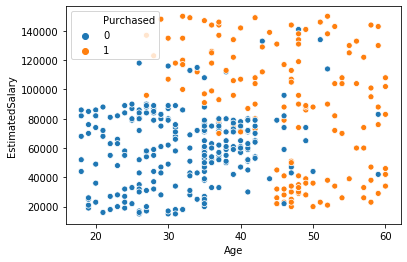

In [10]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=dataset)

### Feature Scaling

In [19]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

-0.24319105298033675

# SVM

In [22]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)


Accuracy of the model : 0.8125
Confusion Matrix      : 
[[46  2]
 [13 19]]



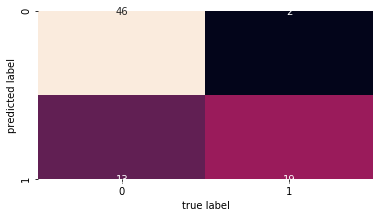

In [35]:
acc = accuracy_score(y_test, svm_pred)
con_mat = confusion_matrix(y_test, svm_pred)

print(f'''
Accuracy of the model : {acc}
Confusion Matrix      : 
{con_mat}
''')

# mat = confusion_matrix(ytest, yfit)
sns.heatmap(con_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');